In [1]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

In [2]:
kick_signals = [
    librosa.load(p)[0] for p in Path().glob('audio/drum_samples/train/kick_*.mp3')
]
snare_signals = [
    librosa.load(p)[0] for p in Path().glob('audio/drum_samples/train/snare_*.mp3')
]

In [3]:
len(kick_signals)

10

In [4]:
len(snare_signals)

10

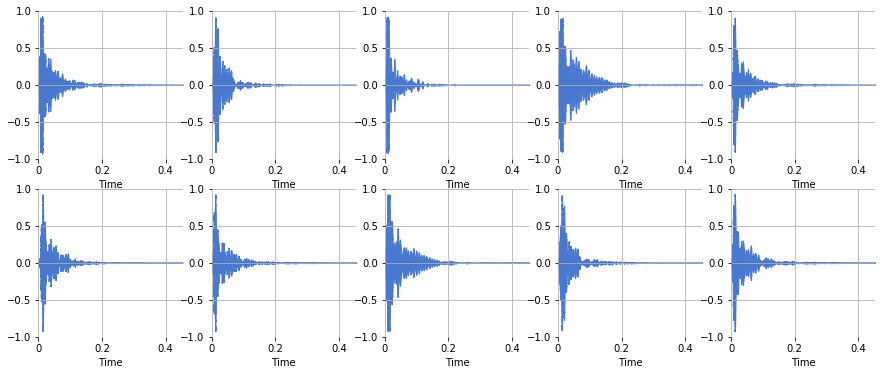

In [5]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(kick_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

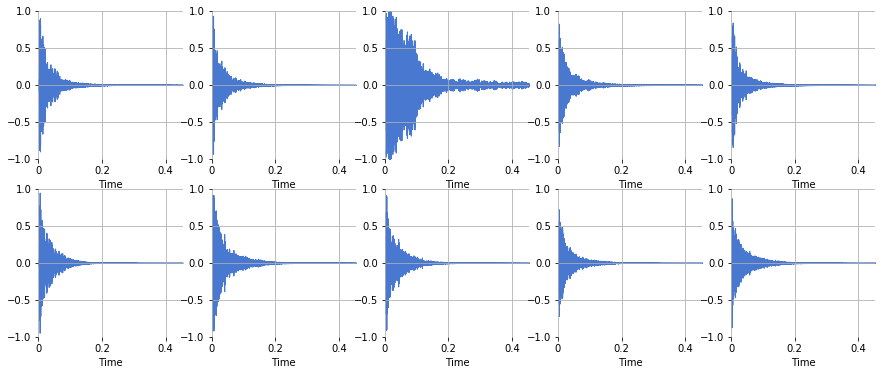

In [6]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(snare_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [7]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [8]:
kick_features = numpy.array([extract_features(x) for x in kick_signals])
snare_features = numpy.array([extract_features(x) for x in snare_signals])

Text(0,0.5,'Count')

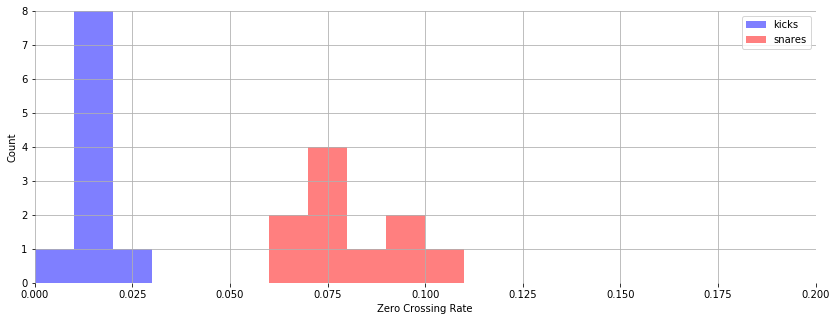

In [9]:
plt.figure(figsize=(14, 5))
plt.hist(kick_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(snare_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('kicks', 'snares'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0,0.5,'Count')

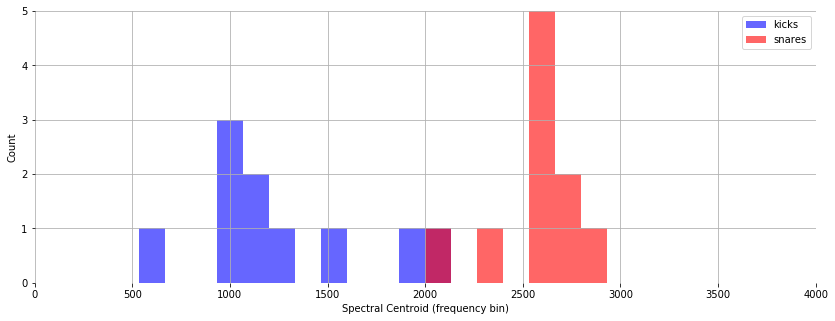

In [10]:
plt.figure(figsize=(14, 5))
plt.hist(kick_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(snare_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('kicks', 'snares'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [11]:
feature_table = numpy.vstack((kick_features, snare_features))
print(feature_table.shape)

(20, 2)


In [12]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0,0.5,'Spectral Centroid')

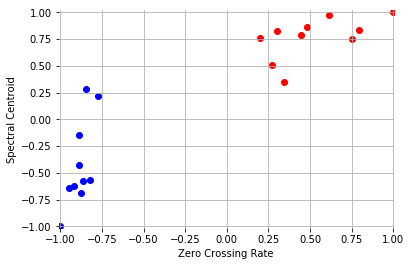

In [13]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')